# 1. Implementar un perceptrón en Python

Implementa un perceptrón funcional en Python utilizando la librería NumPy, y utilízalo para hacer una predicción sobre el dataset de breast_cancer de sklearn. Para ello, ve rellenando la clase que hay en este notebook, siguiendo los siguientes subapartados:

In [3]:
import numpy as np

class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

    def fit(self, X, y):
        """Ajusta los vectores de X a la clase y.
        Parámetros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Vectores de entrenamiento, donde n_examples es el número de vectores,
          y n_features, el número de features por cada vector.
        y : array-like, shape = [n_examples]
          Vector de ground truth.
        Returns
        -------
        self : object
        """
        for _ in range(self.n_iter):
            errors = 0
        for xi, target in zip(X, y):
            prediction = self.predict(xi)
            update = self.eta * (target - prediction)
            self.w_ += update * xi
            self.b_ += update
            errors += int(update != 0.0)
        self.errors_.append(errors)
        return self
     

    def net_input(self, X):
        """Calcula el net input entre X y W"""
        return np.dot(X, self.w_) + self.b_
        

    def predict(self, X):
        """Retorna la clase a la que pertenece el registro X"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)  

1.1. Observa la función "\_\_init\_\_". Esta función contiene los parámetros con los que se inicializará nuestro perceptrón, y que serán accesibles por todos los métodos de la clase. "eta" es el learning_rate, "n_iter" es el número de iteraciones que se harán sobre el conjunto de entrenamiento, "random_state" es la semilla para inicializar los valores aleatorios de $W$, "w_" es el vector $W$, "b_" es la unidad de sesgo o *bias*, y "errors_" indica el número de errores cometidos durante el entrenamiento.

1.2. Implementa la función "net_input", que recibirá un vector de valores $X$, y devolverá el **net input** de $X$ y $W$. Utiliza NumPy para realizar la operación producto punto.

1.3. Implementa la función "predict", que te devuelva la predicción de la clase a la que pertenece un registro $X$. Recuerda que el perceptrón devuelve clase 1 si el "net_input" de $X$ y $W$ es superior a 0, ó clase 0 en caso contrario.

1.4. Implementa la función "fit", que ejecute el algoritmo del perceptrón. Recuerda su definición:
1. Definimos el número de iteraciones sobre el conjunto de datos (nuestro parámetro que ya definimos en la función "\_\_init\_\_", "n_iter").
2. Por cada iteración sobre el conjunto de datos, iteramos sobre cada registro que tengamos.
3. Por cada registro de nuestro conjunto de datos, predecimos a qué clase pertenece dicho registro.
4. Una vez tengamos la clase predicha, computamos el error y el valor actualizado de $W$ y $b$.
5. Actualizamos $W$ y $b$.

1.5. Añade a la función "fit" código para que almacene en la lista "errors_" (atributo de nuestra clase), por cada iteración sobre el conjunto de datos, el número de predicciones fallidas en dicha iteración.

1.6. Con tu perceptrón funcional, utilízalo para predecir sobre un dataset de prueba:

In [4]:
### --------------------------------------------------------------- ###
# Ejecuta esta celda: contiene funciones que necesitarás más adelante #
### --------------------------------------------------------------- ###

from sklearn.datasets import load_iris

def plot_errors_over_epochs(model: Perceptron):
    from matplotlib import pyplot as plt
    plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib import pyplot as plt
    from matplotlib.colors import ListedColormap

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

X, y = load_iris(return_X_y=True, as_frame=True)

y = y.iloc[0:100].values
y = np.where(y == 1, 0, 1)

X = X.iloc[0:100, [0, 2]].values

In [5]:
### -------------------------------------------------------------------------------------------- ###
# Utiliza la clase Perceptron para predecir sobre el dataset compuesto por las variables "X" e "Y" #
### -------------------------------------------------------------------------------------------- ###
perceptron = Perceptron(eta=0.1, n_iter=100)
perceptron.fit(X, y)
predictions = perceptron.predict(X)


1.7 Utiliza la función "plot_errors_over_epochs" para visualizar el proceso de entrenamiento de tu modelo.

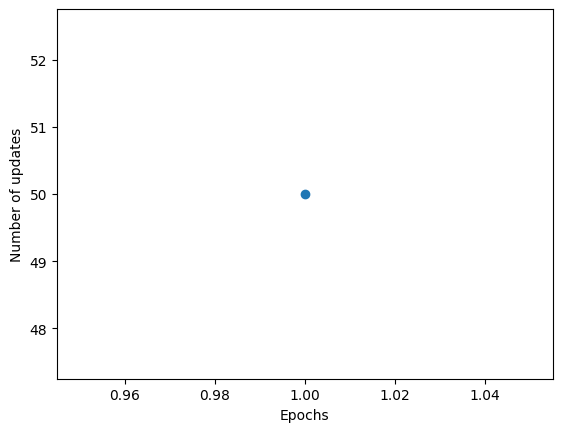

In [6]:

plot_errors_over_epochs(perceptron)

1.8 Utiliza la función "plot_decision_regions" para ver qué tal separa tu modelo el dataset.

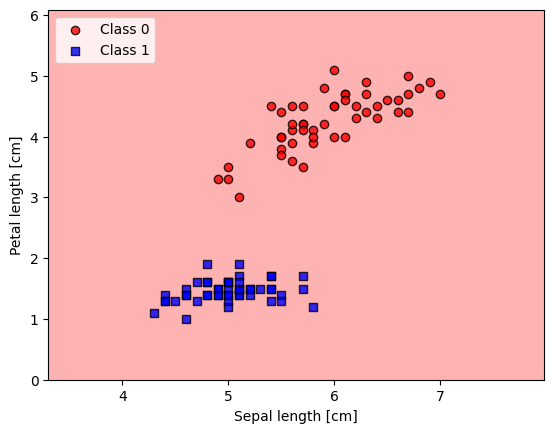

In [7]:
plot_decision_regions(X, y, classifier=perceptron)

# 2. Implementar Adaline en Python

Utilizando la implementación del perceptrón del ejercicio anterior, modifícala en la siguiente celda para tener un modelo Adaline.

- Las funciones "net_input" y "predict" son exactamente iguales.
- En la función "activation", deberás implementar la función de activación de Adaline, que si recuerdas, se definía: $f(X) = X$
- En la función "fit", deberás modificar los valores de actualización de $W$ y $b$ para que cuadren con el modelo de Adaline.

In [8]:
class Adaline:
    """Adaline classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

    def fit(self, X, y):
        """Ajusta los vectores de X a la clase y.
        Parámetros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Vectores de entrenamiento, donde n_examples es el número de vectores,
          y n_features, el número de features por cada vector.
        y : array-like, shape = [n_examples]
          Vector de ground truth.
        Returns
        -------
        self : object
        """
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                output = self.activation(self.net_input(xi))
                update = self.eta * (target - output)
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcula el net input entre X y W"""
        return np.dot(X, self.w_) + self.b_


    def predict(self, X):
        """Retorna la clase a la que pertenece el registro X"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


    def activation(self, X):
        """Función de activación de Adaline"""
        return X